In [2]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [3]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    finalNumber: int


In [4]:
def adder(state: AgentState) -> AgentState:
    """ 두개의 노드를 더함 """
    state["finalNumber"] = state["number1"] + state["number2"]
    return state

def subtractor(state: AgentState) -> AgentState:
    """ 두개의 노드를 빼되, 결과가 항상 양수가 되도록 함 """
    state["finalNumber"] = abs(state["number1"] - state["number2"])
    return state

def decide_next_node(state: AgentState) -> AgentState:
    """ 다음 노드를 조건에 따라 select한다. """

    if state["operation"] == "+":
        return "addition_operation"
    
    elif state["operation"] == "-":
        return "subtraction_operation"


In [5]:
graph = StateGraph(AgentState)

graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)
graph.add_node("router", lambda state:state)

graph.add_node("add_node2", adder)
graph.add_node("subtract_node2", subtractor)
graph.add_node("router2", lambda state:state)

graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router", 
    decide_next_node,

    {
        # Edge: Node
        "addition_operation": "add_node",
        "subtraction_operation": "subtract_node"
    }
)
graph.add_edge("add_node", "router2")
graph.add_edge("subtract_node", "router2")
graph.add_conditional_edges(
    "router2", 
    decide_next_node,

    {
        # Edge: Node
        "addition_operation": "add_node2",
        "subtraction_operation": "subtract_node2"
    }
)
graph.add_edge("add_node2", END)
graph.add_edge("subtract_node2", END)

app = graph.compile()


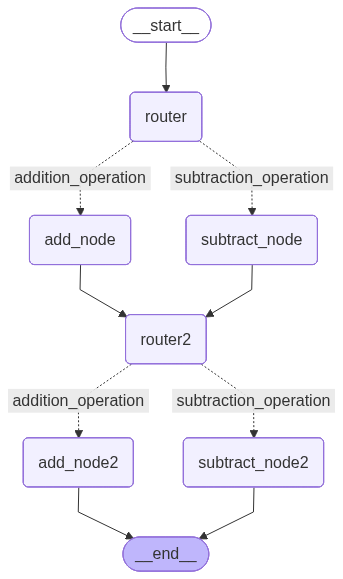

In [6]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [7]:
initial_state_1 = AgentState(number1=10, operation="-", number2=20)
app.invoke(initial_state_1)

{'number1': 10, 'operation': '-', 'number2': 20, 'finalNumber': 10}

In [8]:
print( )